Loading required package: Matrix

Loading required package: foreach

Loading required package: parallel

Loading required package: sp

This is INLA_22.12.16 built 2022-12-23 13:24:10 UTC.
 - See www.r-inla.org/contact-us for how to get help.
 - To enable PARDISO sparse library; see inla.pardiso()



[1] -0.1953559 -0.3443595 -0.8055610 -1.7814833 -2.1102258 -1.8115384
 [7] -2.4497508 -2.5514174 -1.2415724  0.6221150

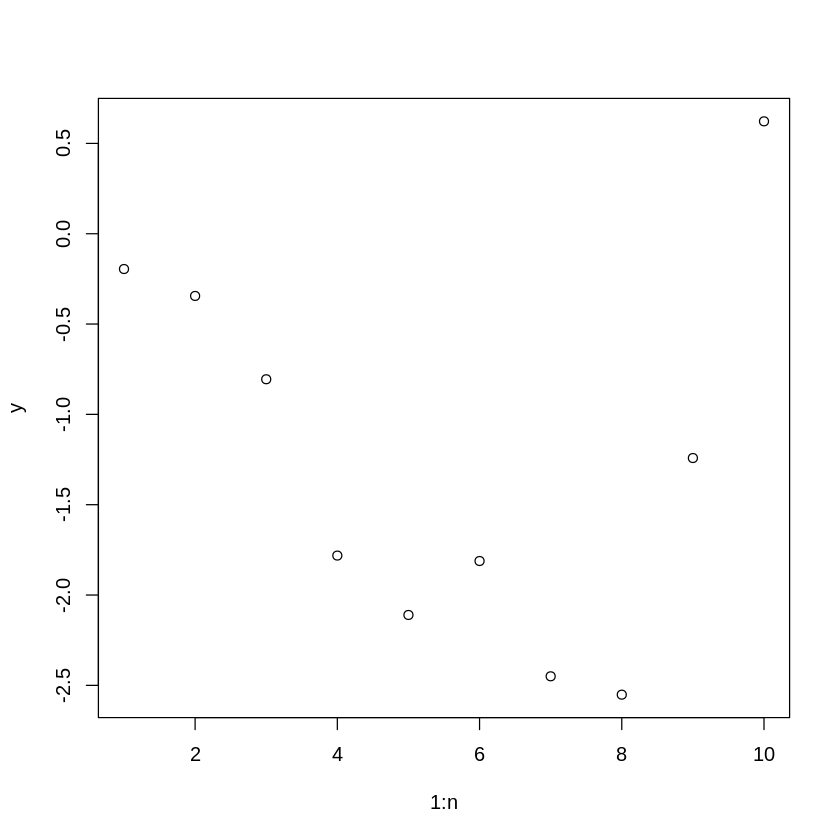

In [1]:
library(INLA)
library(invgamma)
library("MASS")
library("fdrtool") # for rhalfnorm


n = 10

x= (1:n) / n

# =================================================
# gp definition

# kernel priors
length = rinvgamma(1, 4.0, 1.0)
var = rlnorm(1, 0., 0.1)

# distance matrix
XtX <- tcrossprod(x)
XX <- matrix(1, n) %*% diag(XtX)
D <- XX - 2*XtX + t(XX) # distance matrix

# complete kernel
k = var * exp(-0.5 * (D/length ^ 2 ))
k = k + diag(2e-5, n, n)

f = mvrnorm(1, rep(0, n), k)

sigma = rhalfnorm(1, 100)
sigma_mat = diag(sigma, n, n) 
y = mvrnorm(1, f, sigma_mat)

plot(1:n, y)
y

In [2]:
obs_idx = c(8, 24, 45, 61, 77, 84)
gt_obs = c(-0.5724526,   0.1252361,   0.72148114,  0.25085276, -0.3888183,  -0.62317157)

observations = rep(NA, n)
for (i in 1:length(obs_idx)){
    observations[obs_idx[i]] = gt_obs[i]
}
observations

test_inla = inla(y~obs )

[1]         NA         NA         NA         NA         NA         NA
 [7]         NA -0.5724526         NA         NA         NA         NA
[13]         NA         NA         NA         NA         NA         NA
[19]         NA         NA         NA         NA         NA  0.1252361
[25]         NA         NA         NA         NA         NA         NA
[31]         NA         NA         NA         NA         NA         NA
[37]         NA         NA         NA         NA         NA         NA
[43]         NA         NA  0.7214811         NA         NA         NA
[49]         NA         NA         NA         NA         NA         NA
[55]         NA         NA         NA         NA         NA         NA
[61]  0.2508528         NA         NA         NA         NA         NA
[67]         NA         NA         NA         NA         NA         NA
[73]         NA         NA         NA         NA -0.3888183         NA
[79]         NA         NA         NA         NA         NA -0.6231716

Error in inla.core(formula = formula, family = family, contrasts = contrasts,  : 
  Missing data.frame/list `data'. Leaving `data' empty might lead to
		uncontrolled behaviour, therefore is it required.

 *** inla.core.safe:  inla.program has crashed: rerun to get better initial values. try=1/2 
Error in inla.core(formula = formula, family = family, contrasts = contrasts,  : 
  Missing data.frame/list `data'. Leaving `data' empty might lead to
		uncontrolled behaviour, therefore is it required.

 *** inla.core.safe:  inla.program has crashed: rerun to get better initial values. try=2/2 
Error in inla.core(formula = formula, family = family, contrasts = contrasts,  : 
  Missing data.frame/list `data'. Leaving `data' empty might lead to
		uncontrolled behaviour, therefore is it required.


ERROR: Error in inla.core.safe(formula = formula, family = family, contrasts = contrasts, : *** Fail to get good enough initial values. Maybe it is due to something else.
